In [7]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
import imageio

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
import trackpy as tp

from pandas import DataFrame, Series  # for convenience
from sxmreader import SXMReader

In [21]:
if True:
    #frames = SXMReader("./radial distribution_12052019/*.sxm")
    frames = SXMReader("./electromigration_7/Image_720.sxm")
    molecule_size = 5
    min_mass = 0
    min_size = 0
    max_ecc = 0.3

In [22]:
position_list = [0 for _, _ in enumerate(frames)]
for i, image in enumerate(frames):
#     position_list[i] = blob_log(image, max_sigma=30, num_sigma=50, threshold=.07) * frames.meters_per_pixel
    position_list[i] = blob_log(image, max_sigma=30, num_sigma=50, threshold=.07)
    position_list[i] = pd.DataFrame(np.array(position_list[i])).drop(2, axis=1)

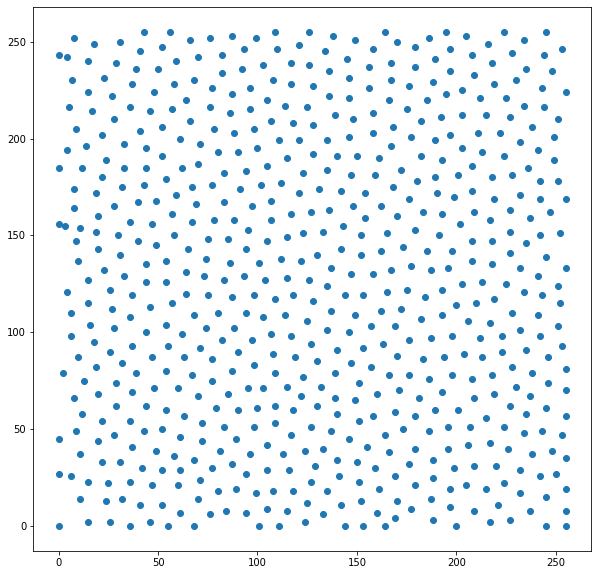

In [23]:
plt.scatter(position_list[0].iloc[:,0], position_list[0].iloc[:,1])
plt.show()

In [42]:
from matplotlib import ticker, cm
def plot_structure_factor(molecule_positions, lim):
    positions = molecule_positions
    x = positions[0]
    y = positions[1]
    xy = np.append(x[:,np.newaxis], y[:,np.newaxis], axis=1).T
    qx = np.linspace(-lim, lim, 800)
    qy = np.linspace(-lim, lim, 800)
    qxx, qyy = np.meshgrid(qx, qy)
    qx = qxx.flatten()
    qy = qyy.flatten()
    qxy = np.append(qx[:,np.newaxis], qy[:,np.newaxis], axis=1)
    mags = np.abs(np.sum(np.exp(-1j * qxy @ xy), axis=1))
    mags = mags.reshape(qxx.shape)
    fig, ax = plt.figure()
    cs = plt.imshow(mags)
    #cs = plt.contourf(qxx, qyy, mags, locator=ticker.LogLocator())
    ax.set_aspect('equal')
    plt.colorbar(cs)
    plt.clim(0,0.01)
    return 123
    #plt.show()

0
0 failed


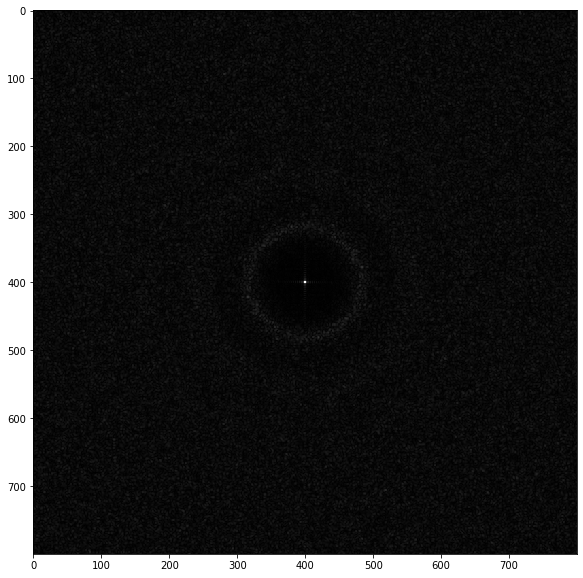

In [40]:
for i, molecule_position in enumerate(position_list):
    try:
        print(i)
        mags = plot_structure_factor(molecule_position, np.pi)
        print(mags)
    except:
        print("{} failed".format(i))

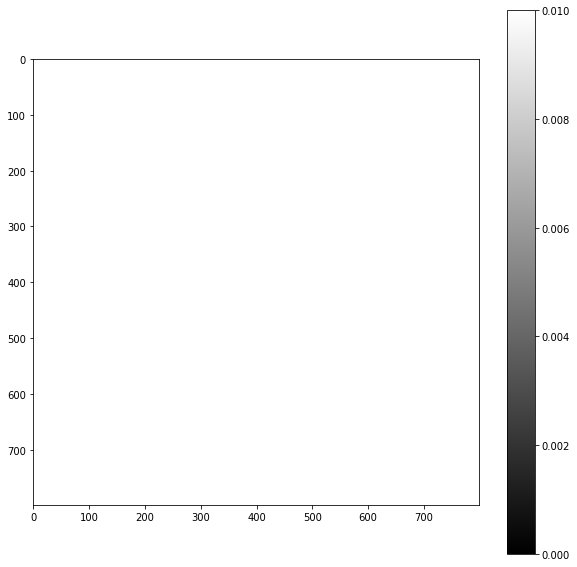

In [43]:
mags = plot_structure_factor(molecule_position, np.pi)

In [ ]:
lattice = pd.DataFrame(lattice)

In [ ]:
import seaborn as sns
sns.scatterplot(x=0, y=1, data=lattice, s=5)

In [ ]:
lattice = []
atom_a = np.array([0, 0])
atom_b = np.array([1/np.sqrt(3), 0])
a1 = np.array([np.sqrt(3)/2, 1/2])
a2 = np.array([np.sqrt(3)/2, -1/2])
for i in range(20):
    for j in range(20):
        cell_origin = i * a1 + j * a2
        lattice.append(cell_origin + atom_a)
        lattice.append(cell_origin + atom_b)
lattice = np.array(lattice)

In [ ]:
plot_structure_factor(lattice, np.pi)